<a href="https://colab.research.google.com/github/wand-work/DADS7203-WordEmbedding/blob/main/Word_Embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [24]:
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.test.utils import common_texts
from gensim.models import Word2Vec

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/wand-work/DADS7203-WordEmbedding/refs/heads/main/TaylorSwift%20(1).csv')
data.head()

,Unnamed: 0,Artist,Title,Album,Year,Date,Lyric
0,1,Taylor Swift,A Monster In My Closet!,NaN,2000,1/1/2000,there's a monster in my closet and i don't kno...
1,2,Taylor Swift,​epiphany (the long pond studio sessions),folklore: the long pond studio sessions (from ...,2002,25/11/2002,keep your helmet keep your life son just a fle...
2,3,Taylor Swift,Dark Blue Tennessee,2004-2005 Demo CD,2004,1/1/2004,he said i got me a nice new apartment in the c...
3,4,Taylor Swift,All Night Diner,Unreleased Songs,2005,1/1/2005,i wake up i stretch out i wonder what you're d...
4,5,Taylor Swift,Teardrops on My Guitar,Taylor Swift,2006,24/10/2006,drew looks at me i fake a smile so he won't se...


# **Clean**

In [4]:
#clean group 1
df1 = data[data['Year'] <= 2015].reset_index(drop=True)
drop_df1 = df1.dropna(subset=['Lyric'])
group1 = drop_df1['Lyric']
g1 = pd.DataFrame({'Lyric': group1})
print(g1)

                                                 Lyric
0    there's a monster in my closet and i don't kno...
1    keep your helmet keep your life son just a fle...
2    he said i got me a nice new apartment in the c...
3    i wake up i stretch out i wonder what you're d...
4    drew looks at me i fake a smile so he won't se...
..                                                 ...
179  i want to thank the fans for the last 0 years ...
180  enchanted this night is sparkling don't you le...
181  5 may 05 las vegas  ed sheeran  tenerife sea  ...
182  he said let's get out of this town drive out o...
183  i write this to explain why ill be holding bac...

[184 rows x 1 columns]


In [5]:
#clean group 2
df2 = data[data['Year'] > 2015].reset_index(drop=True)
drop_df2 = df2.dropna(subset=['Lyric'])
group2 = drop_df2['Lyric']
g2 = pd.DataFrame({'Lyric': group2})
print(g2)

                                                 Lyric
0    baby this is what you came for lightning strik...
1    search  where is the video of kanye telling me...
3    i don't like your little games don't like your...
4    taylor swift  future i wanna be your end game ...
5    knew he was a killer first time that i saw him...
..                                                 ...
148  spoken  it's jingleball theres santa hats ever...
149  to put it plainly we just couldnt stop writing...
150  zwrotka  siedzę i patrzę jak czytasz z głową p...
151  friends break up friends get married strangers...
152  when the dinner is cold and the chatter gets o...

[151 rows x 1 columns]


In [6]:
#function to clean stopword
stop_words=set(stopwords.words("english"))

def remove_stopwords(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word not in stop_words and word.isalpha()]
    return " ".join(filtered_words)

In [7]:
#clean stop word group 1
word1 = []
for row in g1['Lyric'].apply(remove_stopwords):
    words = row.split(' ')
    word1.append(words)
word1[:3]

[['monster',
  'closet',
  'know',
  'ever',
  'seen',
  'ever',
  'pounced',
  'wonder',
  'looks',
  'like',
  'purple',
  'red',
  'eyes',
  'wonder',
  'likes',
  'eat',
  'size',
  'tonight',
  'gon',
  'na',
  'catch',
  'set',
  'real',
  'big',
  'trap',
  'train',
  'really',
  'well',
  'answer',
  'clap',
  'looked',
  'closet',
  'nothing',
  'stuff',
  'know',
  'monster',
  'heard',
  'huff',
  'puff',
  'could',
  'wants',
  'eat',
  'maybe',
  'favorite',
  'tray',
  'comes',
  'get',
  'scream',
  'loudly',
  'go',
  'away',
  'nice',
  'name',
  'happy',
  'bad',
  'name',
  'grouch',
  'suspect',
  'leaving',
  'kick'],
 ['keep',
  'helmet',
  'keep',
  'life',
  'son',
  'flesh',
  'wound',
  'rifle',
  'crawling',
  'beaches',
  'sir',
  'think',
  'bleeding',
  'things',
  'ca',
  'speak',
  'serve',
  'fall',
  'watch',
  'breathe',
  'watch',
  'breathing',
  'something',
  'med',
  'school',
  'cover',
  'someone',
  'daughter',
  'someone',
  'mother',
  'hold

In [8]:
#clean stop word group 2
word2 = []
for row in g2['Lyric'].apply(remove_stopwords):
    words = row.split(' ')
    word2.append(words)
word2[:3]

[['baby',
  'came',
  'lightning',
  'strikes',
  'every',
  'time',
  'moves',
  'everybody',
  'watching',
  'looking',
  'oh',
  'oh',
  'oh',
  'oh',
  'oh',
  'oh',
  'oh',
  'oh',
  'oh',
  'oh',
  'oh',
  'oh',
  'oh',
  'oh',
  'baby',
  'came',
  'lightning',
  'strikes',
  'every',
  'time',
  'moves',
  'everybody',
  'watching',
  'looking',
  'oh',
  'oh',
  'oh',
  'oh',
  'oh',
  'oh',
  'oh',
  'oh',
  'oh',
  'oh',
  'oh',
  'oh',
  'oh',
  'oh',
  'verse',
  'go',
  'fast',
  'game',
  'play',
  'knows',
  'got',
  'ta',
  'way',
  'say',
  'nothing',
  'need',
  'say',
  'place',
  'leave',
  'baby',
  'came',
  'lightning',
  'strikes',
  'every',
  'time',
  'moves',
  'everybody',
  'watching',
  'looking',
  'oh',
  'oh',
  'oh',
  'oh',
  'oh',
  'oh',
  'oh',
  'oh',
  'oh',
  'oh',
  'oh',
  'oh',
  'oh',
  'oh'],
 ['search',
  'video',
  'kanye',
  'telling',
  'going',
  'call',
  'bitch',
  'song',
  'exist',
  'never',
  'happened',
  'get',
  'control',
 

# **skip-gram group1**

In [9]:
model1 = Word2Vec(word1, min_count=1,workers=3, window =3, sg = 1) #sg = 1 is skip-gram
print(model1)

Word2Vec<vocab=3213, vector_size=100, alpha=0.025>


In [10]:
model1.wv.most_similar('love')[:5]

[('want', 0.9747722148895264),
 ('girl', 0.9716998934745789),
 ('clean', 0.9631475210189819),
 ('trouble', 0.9629263281822205),
 ('works', 0.9626342058181763)]

In [11]:
model1.wv.most_similar('break')[:5]

[('hate', 0.9613984227180481),
 ('show', 0.9568811655044556),
 ('would', 0.9564722776412964),
 ('find', 0.9549834728240967),
 ('someday', 0.9540927410125732)]

In [12]:
model1.wv.most_similar('perfect')[:5]

[('months', 0.9982707500457764),
 ('girls', 0.9982705116271973),
 ('sick', 0.9981746673583984),
 ('house', 0.9981098771095276),
 ('pull', 0.9980500340461731)]

In [13]:
model1.wv.most_similar('night')[:5]

[('wonderstruck', 0.9914471507072449),
 ('put', 0.9913408160209656),
 ('dream', 0.9911314845085144),
 ('style', 0.9911308288574219),
 ('december', 0.990827739238739)]

In [14]:
model1.wv.most_similar('heart')[:5]

[('word', 0.989203691482544),
 ('known', 0.9892024397850037),
 ('win', 0.9880685806274414),
 ('miss', 0.9871059656143188),
 ('taken', 0.987089991569519)]

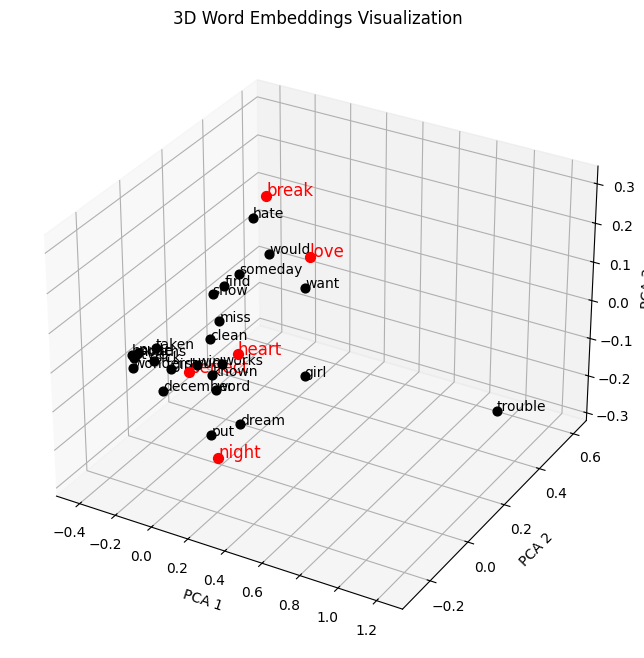

In [15]:
#plot graph
target_words = ['love', 'break', 'perfect', 'night', 'heart']
similar_words = {word: [w for w, _ in model1.wv.most_similar(word, topn=5)] for word in target_words}
all_words = target_words + sum(similar_words.values(), [])
word_vectors = np.array([model1.wv[word] for word in all_words])

pca = PCA(n_components=3)
word_vectors_3d = pca.fit_transform(word_vectors)


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

#target_words(red)
for i, word in enumerate(target_words):
    x, y, z = word_vectors_3d[i]
    ax.scatter(x, y, z, color='red', s=50, label=word)
    ax.text(x, y, z, word, color='red', fontsize=12)

#similar_words(black)
for i, word in enumerate(all_words[len(target_words):]):
    x, y, z = word_vectors_3d[i + len(target_words)]
    ax.scatter(x, y, z, color='black', s=40)
    ax.text(x, y, z, word, color='black', fontsize=10)

ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.title("3D Word Embeddings Visualization")
plt.show()

# **skip-gram group2**

In [16]:
model2 = Word2Vec(word2, min_count=1,workers=3, window =3, sg = 1) #sg = 1 is skip-gram
print(model2)

Word2Vec<vocab=4432, vector_size=100, alpha=0.025>


In [17]:
model2.wv.most_similar('love')[:5]

[('fight', 0.9936276078224182),
 ('really', 0.993463397026062),
 ('fake', 0.9930596351623535),
 ('play', 0.9929693341255188),
 ('win', 0.992541491985321)]

In [18]:
model2.wv.most_similar('break')[:5]

[('ones', 0.9957456588745117),
 ('alone', 0.9957062602043152),
 ('road', 0.9956835508346558),
 ('called', 0.9954009652137756),
 ('juliet', 0.9947961568832397)]

In [19]:
model2.wv.most_similar('perfect')[:5]

[('cry', 0.9974406957626343),
 ('guess', 0.9972502589225769),
 ('picture', 0.9970144629478455),
 ('wake', 0.9969022870063782),
 ('ive', 0.9967147707939148)]

In [20]:
model2.wv.most_similar('night')[:5]

[('middle', 0.9922991991043091),
 ('lights', 0.9919484853744507),
 ('dreams', 0.9913776516914368),
 ('air', 0.9897953271865845),
 ('mind', 0.9895994067192078)]

In [21]:
model2.wv.most_similar('heart')[:5]

[('used', 0.9973649978637695),
 ('ask', 0.9971529841423035),
 ('blue', 0.9971380233764648),
 ('james', 0.9971165060997009),
 ('far', 0.9971038103103638)]

**Plot Data Group2**

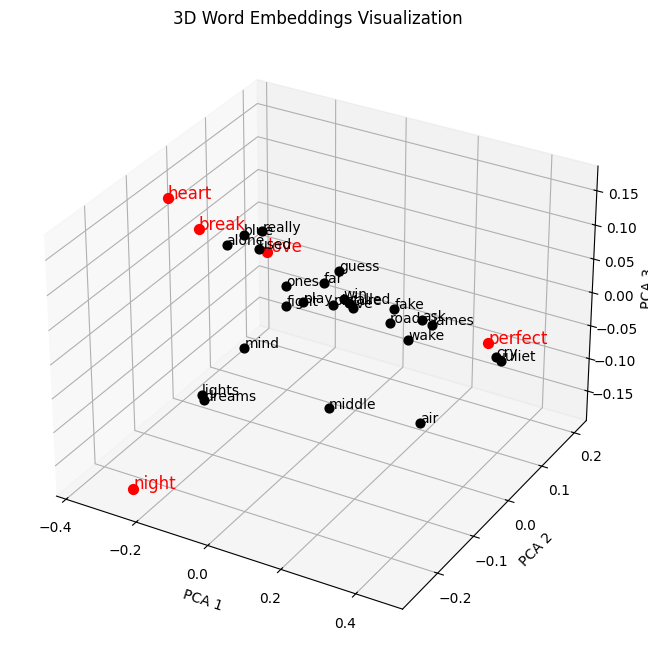

In [23]:
#plot graph
target_words = ['love', 'break', 'perfect', 'night', 'heart']
similar_words = {word: [w for w, _ in model2.wv.most_similar(word, topn=5)] for word in target_words}
all_words = target_words + sum(similar_words.values(), [])
word_vectors = np.array([model2.wv[word] for word in all_words])

pca = PCA(n_components=3)
word_vectors_3d = pca.fit_transform(word_vectors)


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

#target_words(red)
for i, word in enumerate(target_words):
    x, y, z = word_vectors_3d[i]
    ax.scatter(x, y, z, color='red', s=50, label=word)
    ax.text(x, y, z, word, color='red', fontsize=12)

#similar_words(black)
for i, word in enumerate(all_words[len(target_words):]):
    x, y, z = word_vectors_3d[i + len(target_words)]
    ax.scatter(x, y, z, color='black', s=40)
    ax.text(x, y, z, word, color='black', fontsize=10)

ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.title("3D Word Embeddings Visualization")
plt.show()